In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset from local CSV or online
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, header=None, names=columns)

# Replace zeros with NaN for relevant columns
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, pd.NA)
df.fillna(df.mean(), inplace=True)  # Or use KNN imputation for better results

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(df.drop("Outcome", axis=1))
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


<ipython-input-5-39c888356a31>:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(df.mean(), inplace=True)  # Or use KNN imputation for better results


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      4.494673  121.686763      72.405184      29.153420  155.548223   
std    

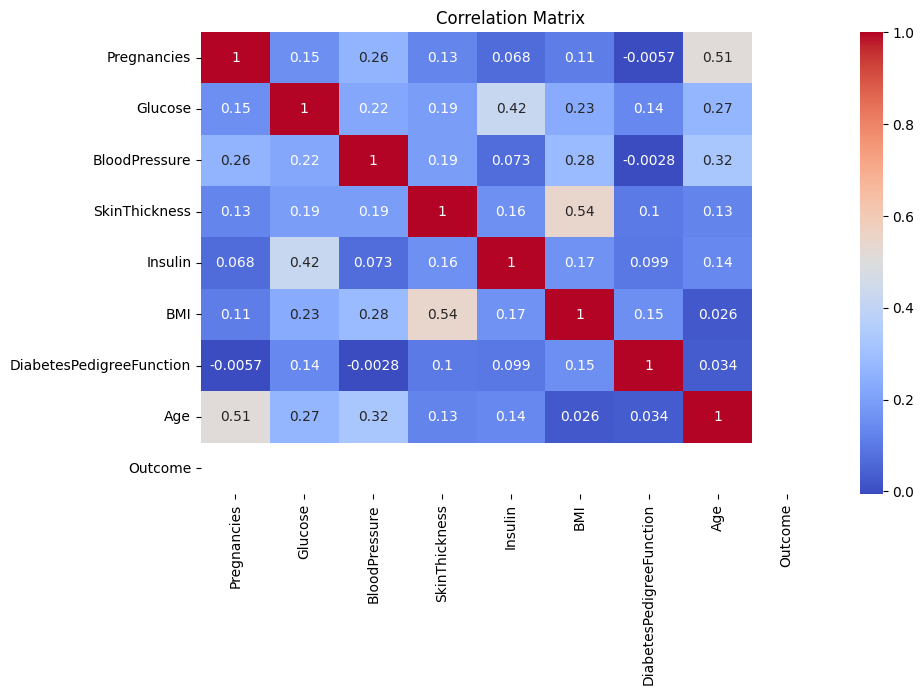

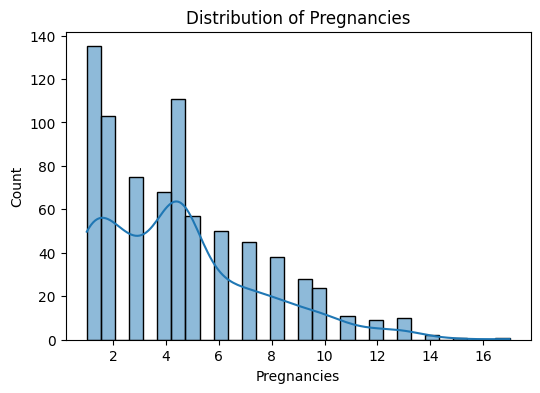

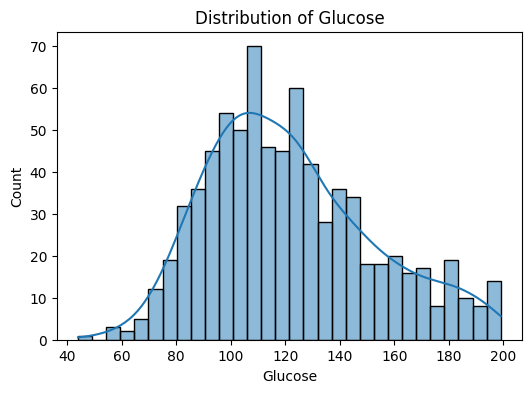

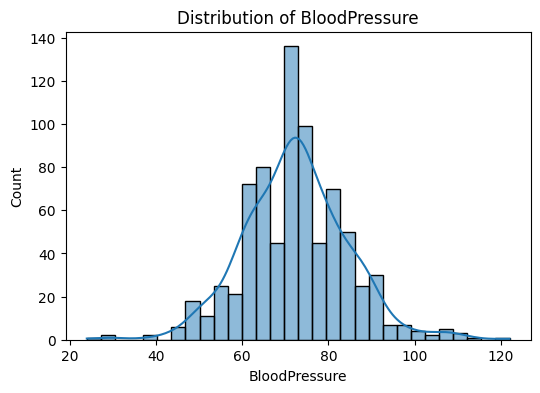

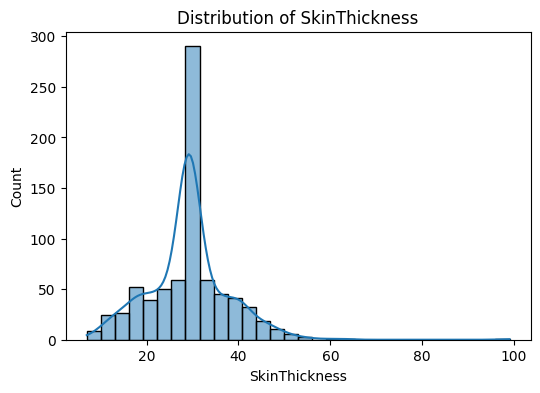

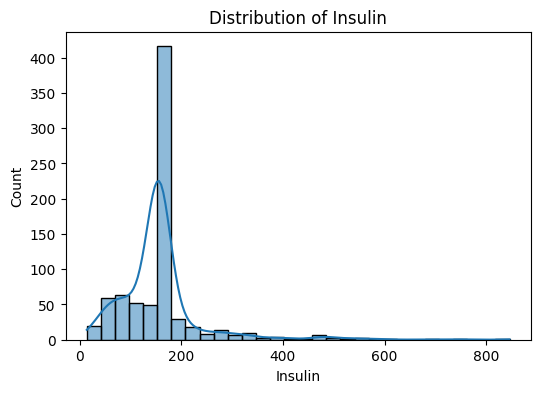

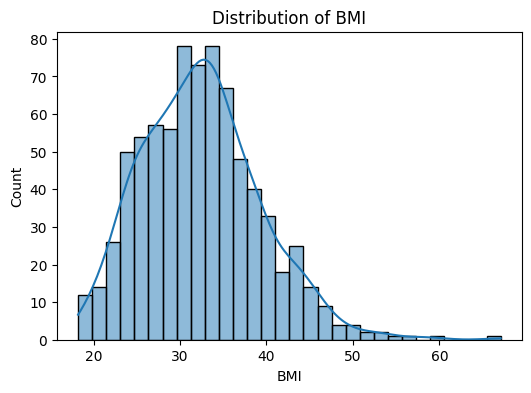

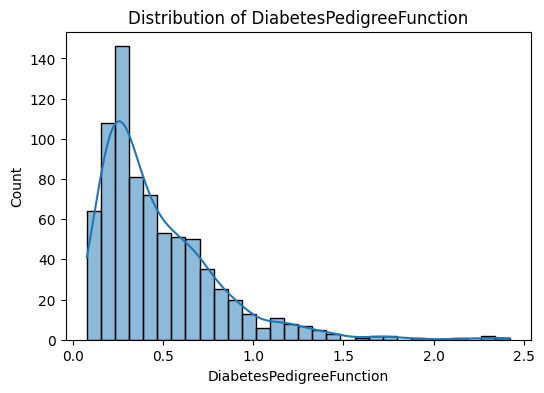

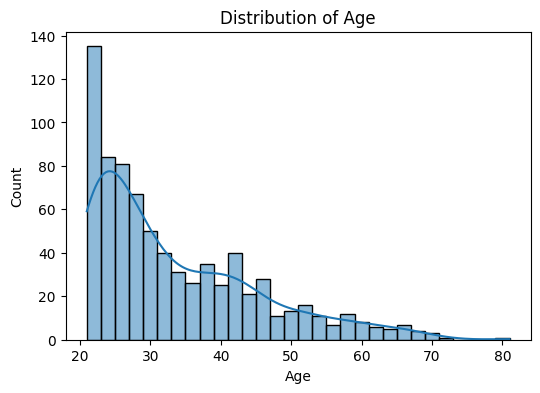

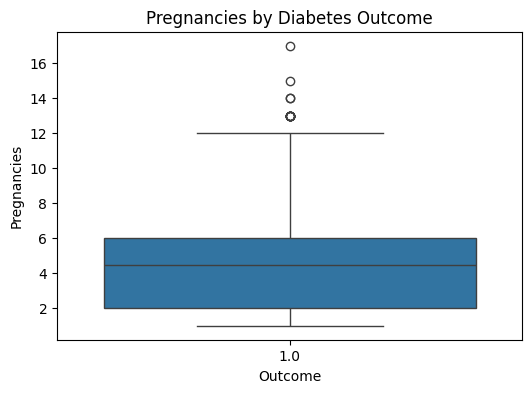

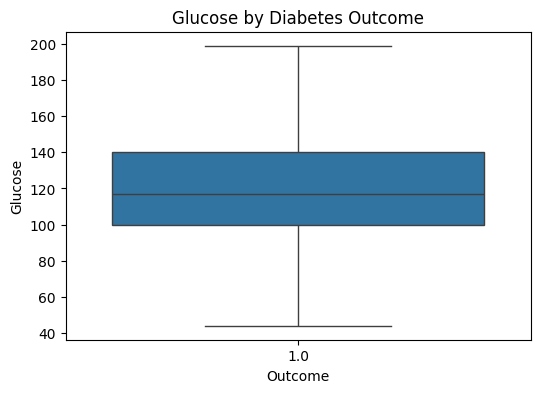

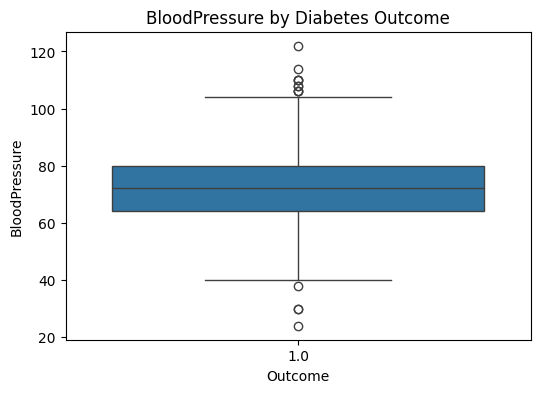

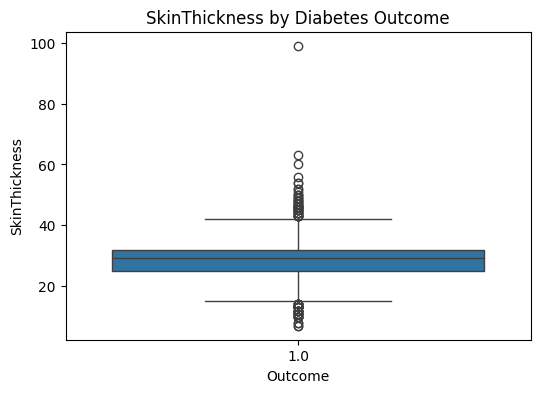

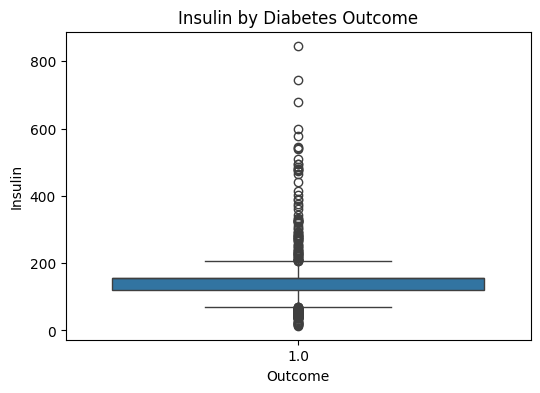

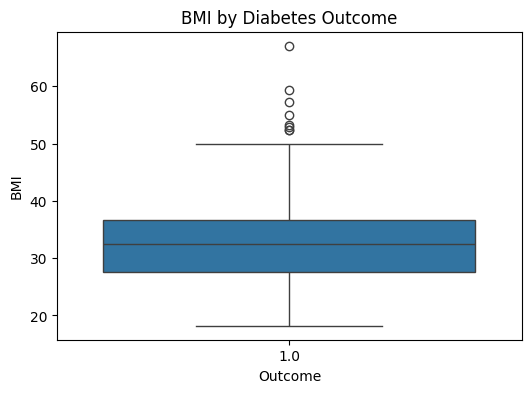

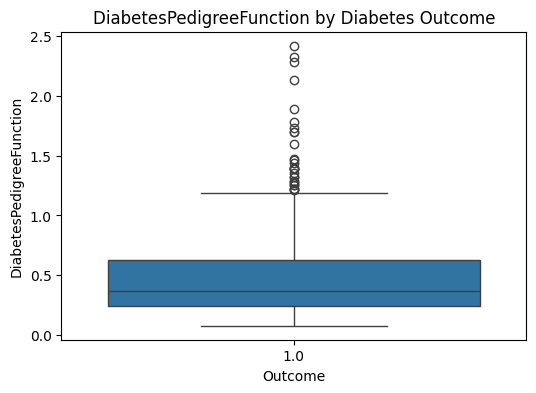

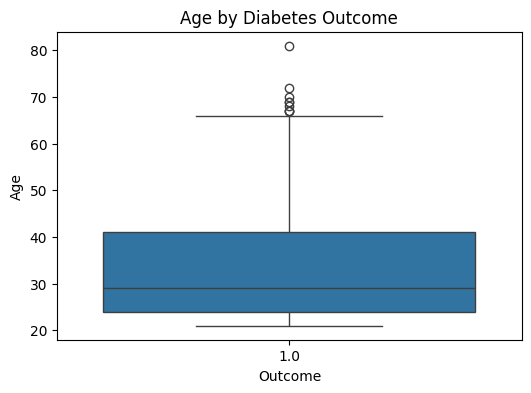

In [ ]:
#  Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#  Load Dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, header=None, names=columns)

#  Preprocessing
df.replace(0, np.nan, inplace=True)
df.fillna(df.mean(), inplace=True)

# Normalize features (optional for EDA)
scaler = StandardScaler()
features = df.drop("Outcome", axis=1)
df_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
df_scaled['Outcome'] = df['Outcome']

# Basic Info
print(df.info())
print(df.describe())
print("\nClass Balance:\n", df['Outcome'].value_counts())

#  Correlation Matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#  Distribution Plots
for col in df.columns[:-1]:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

#  Outcome vs Features
for col in df.columns[:-1]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Outcome", y=col, data=df)
    plt.title(f'{col} by Diabetes Outcome')
    plt.show()


🔹 Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.59      0.50      0.54        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154

Accuracy: 0.7012987012987013

🔹 Random Forest Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.72      0.63      0.67        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154

Accuracy: 0.7857142857142857


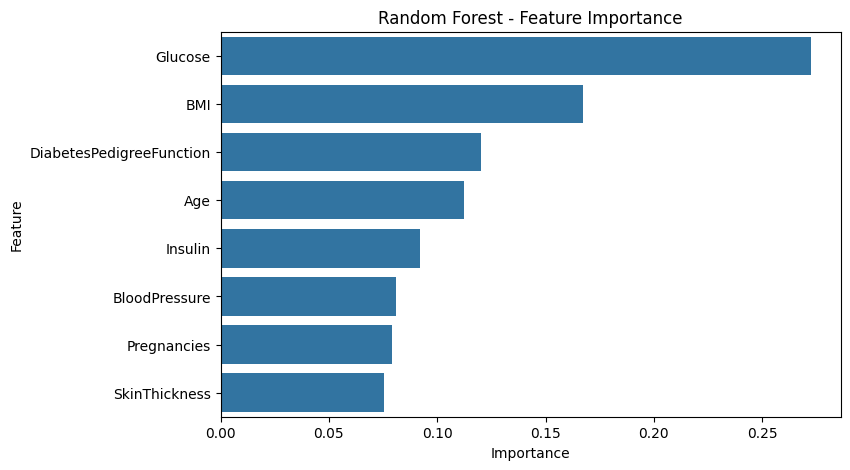


🔹 XGBoost Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.67      0.57      0.62        54

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154

Accuracy: 0.7532467532467533


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:56:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

#  Prepare data
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


#  1. Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

print("🔹 Logistic Regression Report:")
print(classification_report(y_test, log_preds))
print("Accuracy:", accuracy_score(y_test, log_preds))

#  2. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("\n🔹 Random Forest Report:")
print(classification_report(y_test, rf_preds))
print("Accuracy:", accuracy_score(y_test, rf_preds))

# Feature importance (Random Forest)
importances = rf_model.feature_importances_
feat_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title("Random Forest - Feature Importance")
plt.show()

# 3. XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

print("\n🔹 XGBoost Report:")
print(classification_report(y_test, xgb_preds))
print("Accuracy:", accuracy_score(y_test, xgb_preds))


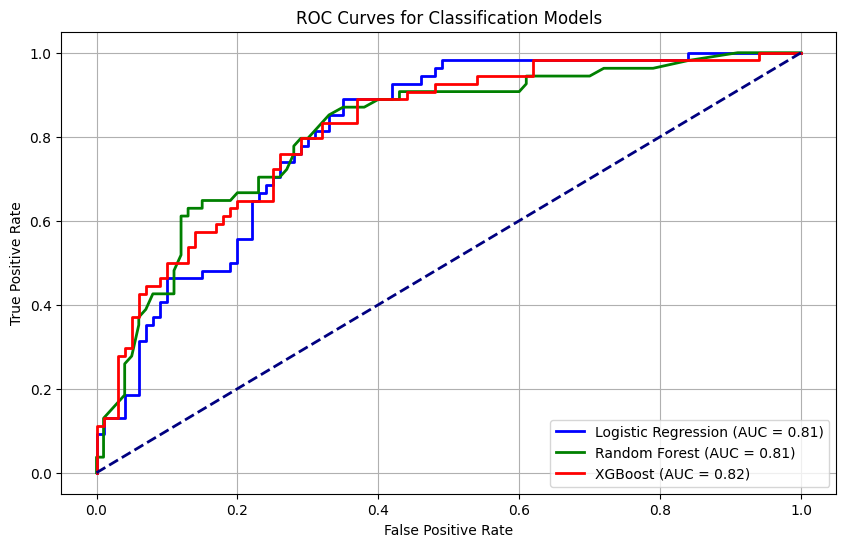

In [ ]:
#  ROC-AUC and Plotting for Models
from sklearn.metrics import roc_curve, auc

#  Logistic Regression ROC-AUC
log_fpr, log_tpr, _ = roc_curve(y_test, log_model.predict_proba(X_test)[:, 1])
log_auc = auc(log_fpr, log_tpr)

#  Random Forest ROC-AUC
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
rf_auc = auc(rf_fpr, rf_tpr)

#  XGBoost ROC-AUC
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
xgb_auc = auc(xgb_fpr, xgb_tpr)

#  Plot ROC Curves
plt.figure(figsize=(10, 6))

# Logistic Regression
plt.plot(log_fpr, log_tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {log_auc:.2f})')

# Random Forest
plt.plot(rf_fpr, rf_tpr, color='green', lw=2, label=f'Random Forest (AUC = {rf_auc:.2f})')

# XGBoost
plt.plot(xgb_fpr, xgb_tpr, color='red', lw=2, label=f'XGBoost (AUC = {xgb_auc:.2f})')

# Diagonal (No Skill line)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Labels and Formatting
plt.title('ROC Curves for Classification Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
!pip install streamlit



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.5 MB/s eta 0:00:00
